In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


with open('X_resnet_3.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_resnet_3.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 14804, Test: 3701


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.845601  0.813472  0.829225   579.000000
Baroque                  0.852632  0.819562  0.835770   593.000000
Cubism                   0.843049  0.830022  0.836485   453.000000
Fauvism                  0.697436  0.786127  0.739130   173.000000
Impressionism            0.872420  0.784148  0.825933   593.000000
Minimalism               0.867725  0.877005  0.872340   187.000000
Naive_Art_Primitivism    0.791165  0.832981  0.811535   473.000000
Pointillism              0.784483  0.866667  0.823529   105.000000
Rococo                   0.759887  0.870550  0.811463   309.000000
Ukiyo_e                  0.913580  0.940678  0.926931   236.000000
accuracy                 0.830586  0.830586  0.830586     0.830586
macro avg                0.822798  0.842121  0.831234  3701.000000
weighted avg             0.833392  0.830586  0.830927  3701.000000
--------------------------------------------------------------

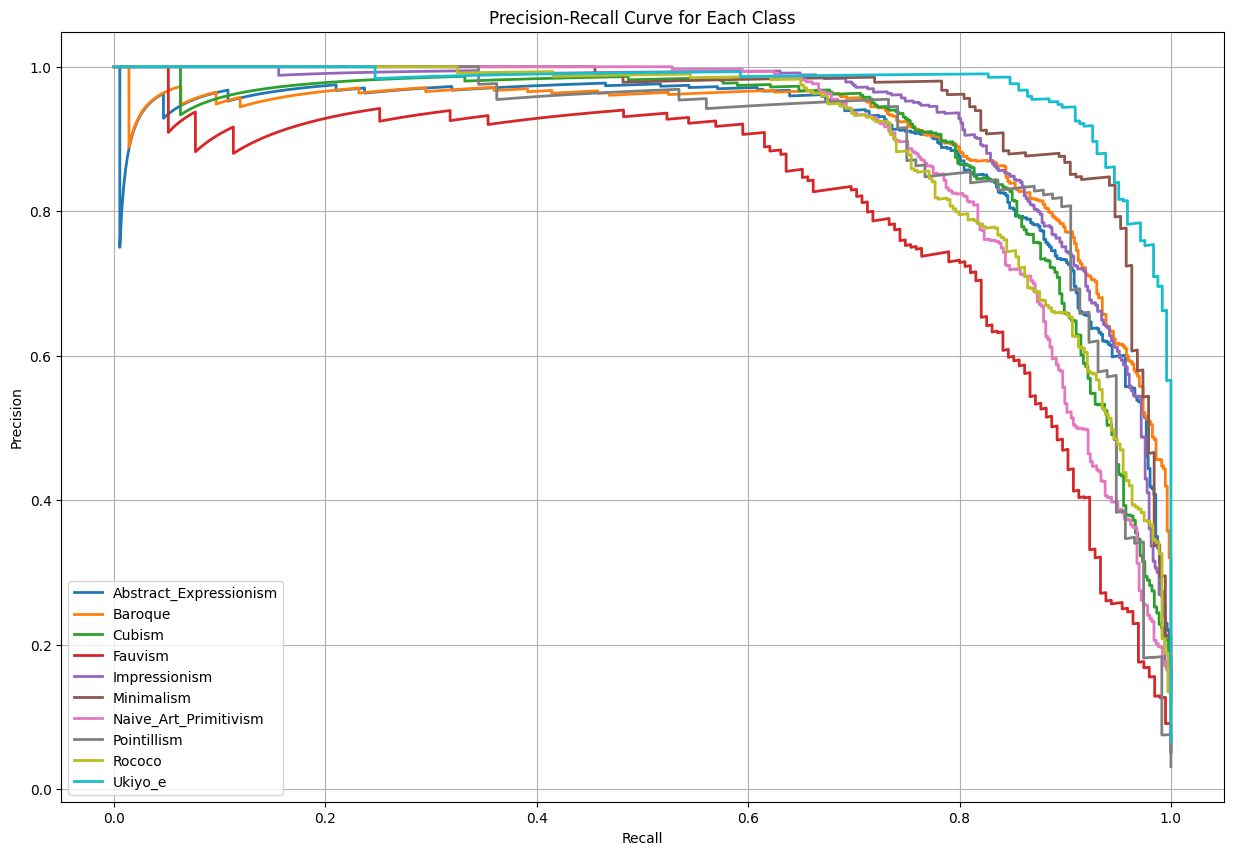

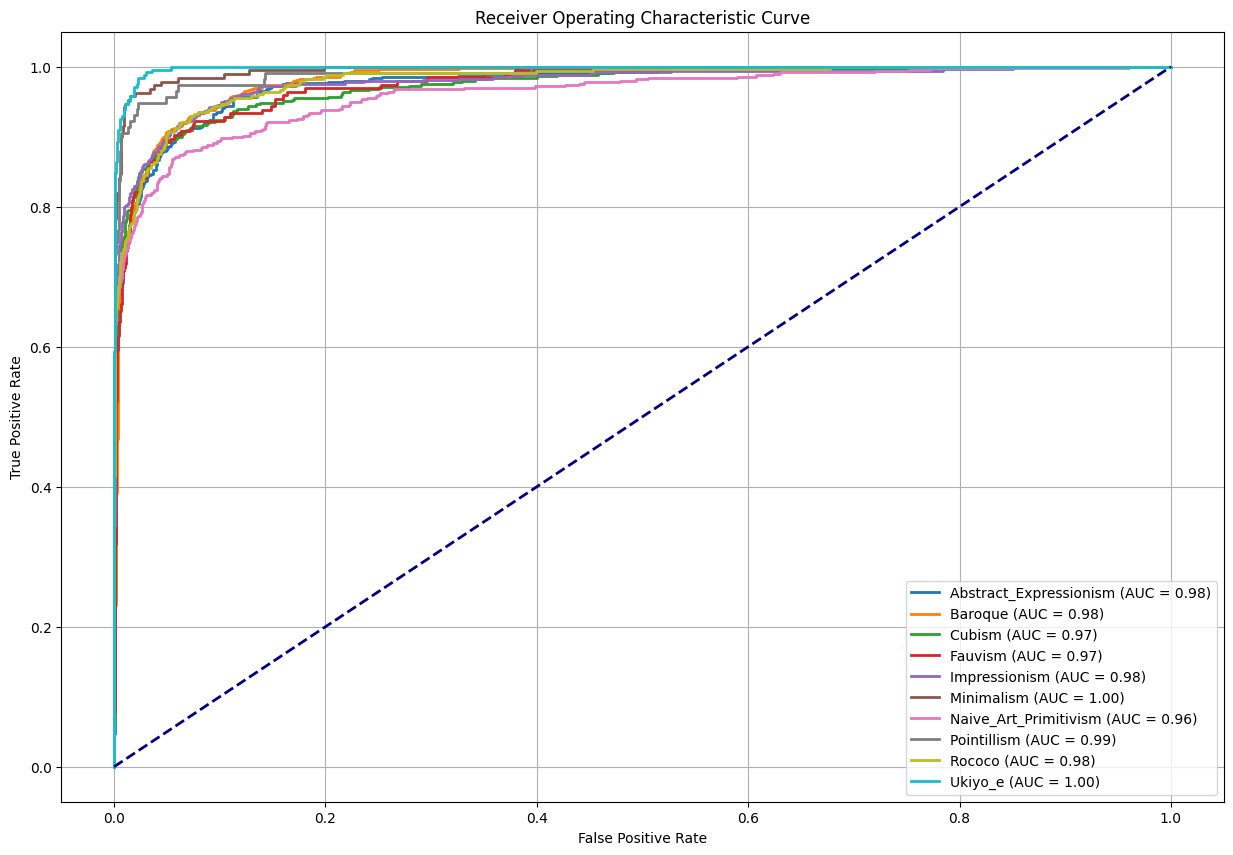

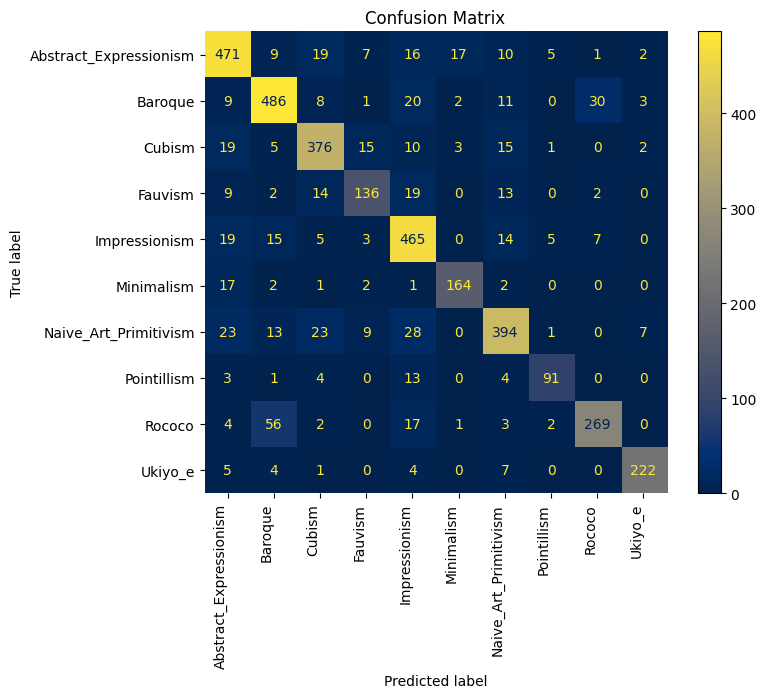

In [8]:
from sklearn.svm import SVC

svc_model = SVC(
    kernel='poly', 
    C=60.38139932266792, 
    gamma=3.011984770287577, 
    degree=2, 
    random_state=42,
    probability = True
)

svc_model.fit(X_train_scaled, y_train)
frmodel_pred = svc_model.predict(X_test_scaled)
frmodel_pred_proba = svc_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

                        precision    recall  f1-score      support
Abstract_Expressionism   0.845601  0.813472  0.829225   579.000000
Baroque                  0.852632  0.819562  0.835770   593.000000
Cubism                   0.843049  0.830022  0.836485   453.000000
Fauvism                  0.697436  0.786127  0.739130   173.000000
Impressionism            0.872420  0.784148  0.825933   593.000000
Minimalism               0.867725  0.877005  0.872340   187.000000
Naive_Art_Primitivism    0.791165  0.832981  0.811535   473.000000
Pointillism              0.784483  0.866667  0.823529   105.000000
Rococo                   0.759887  0.870550  0.811463   309.000000
Ukiyo_e                  0.913580  0.940678  0.926931   236.000000
accuracy                 0.830586  0.830586  0.830586     0.830586
macro avg                0.822798  0.842121  0.831234  3701.000000
weighted avg             0.833392  0.830586  0.830927  3701.000000
--------------------------------------------------------------

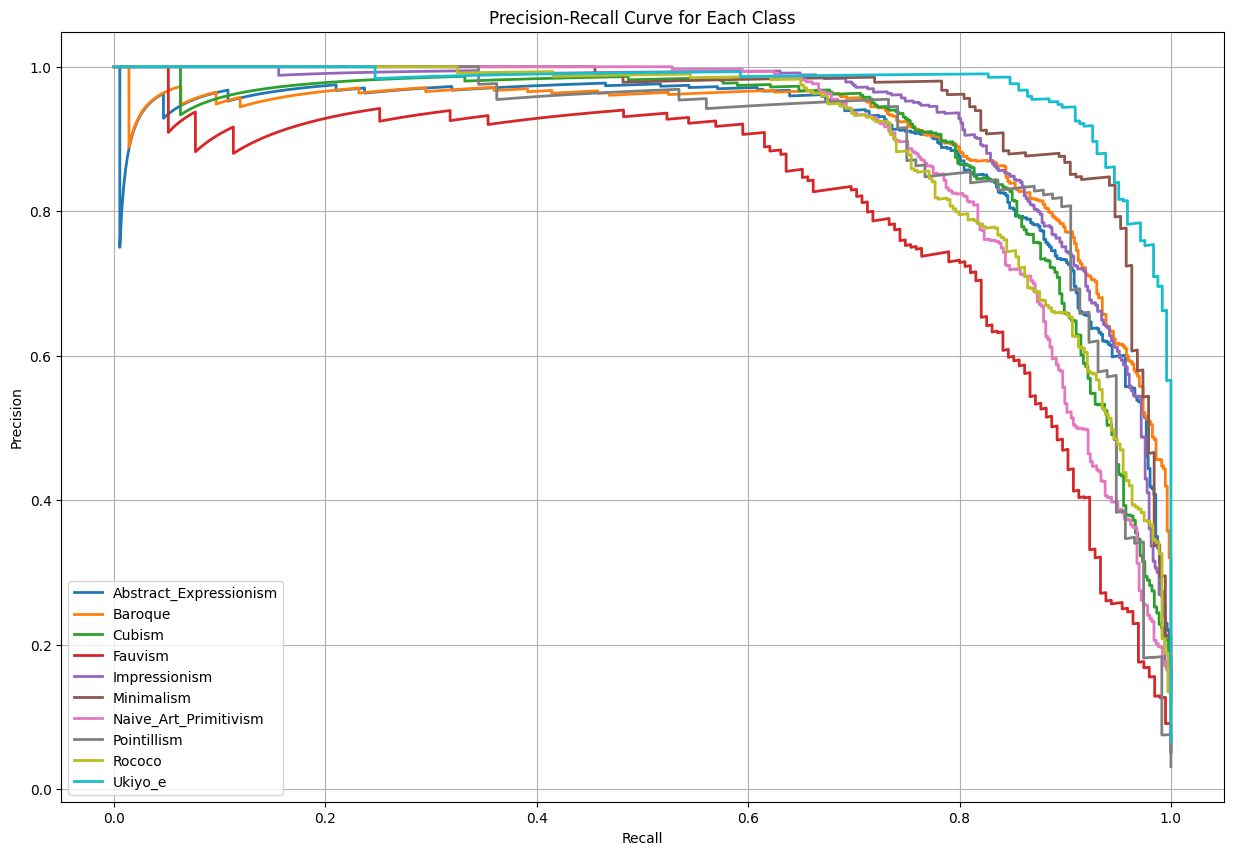

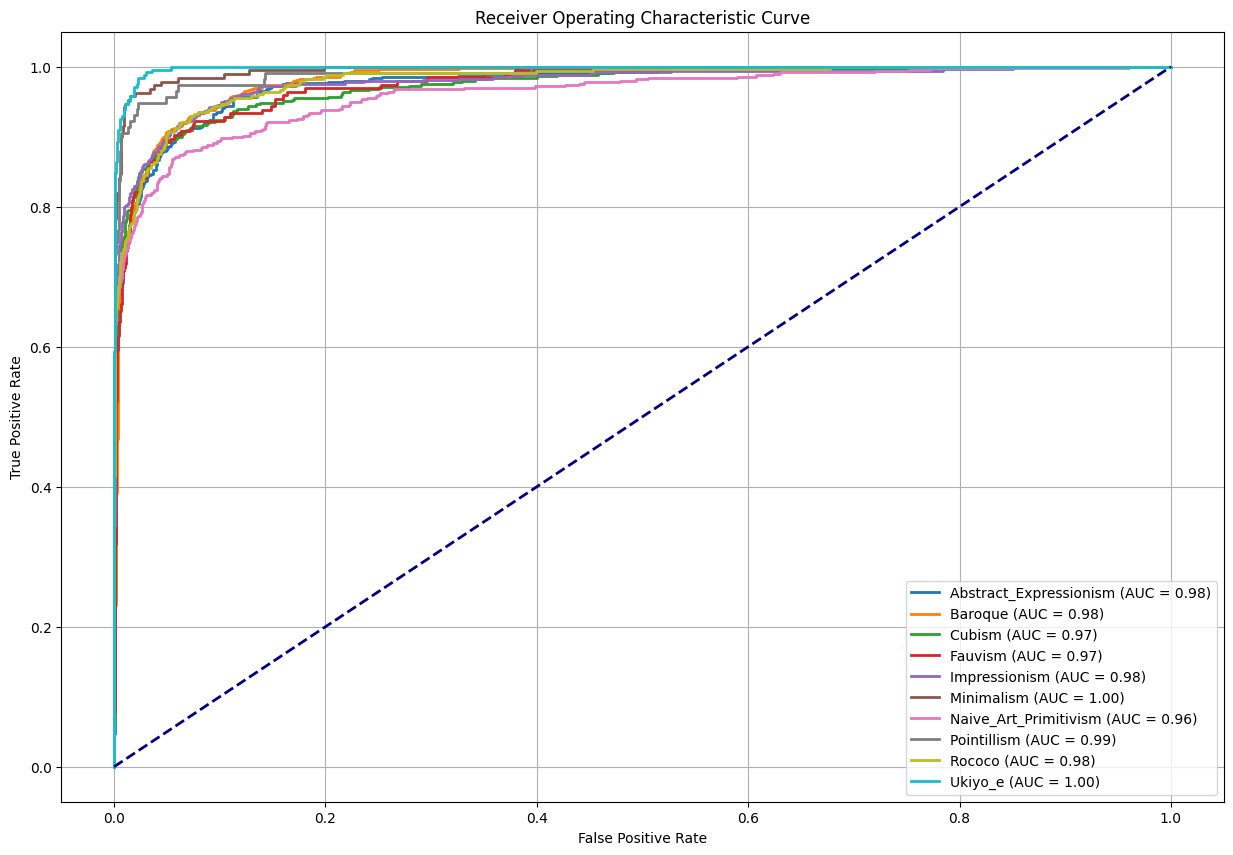

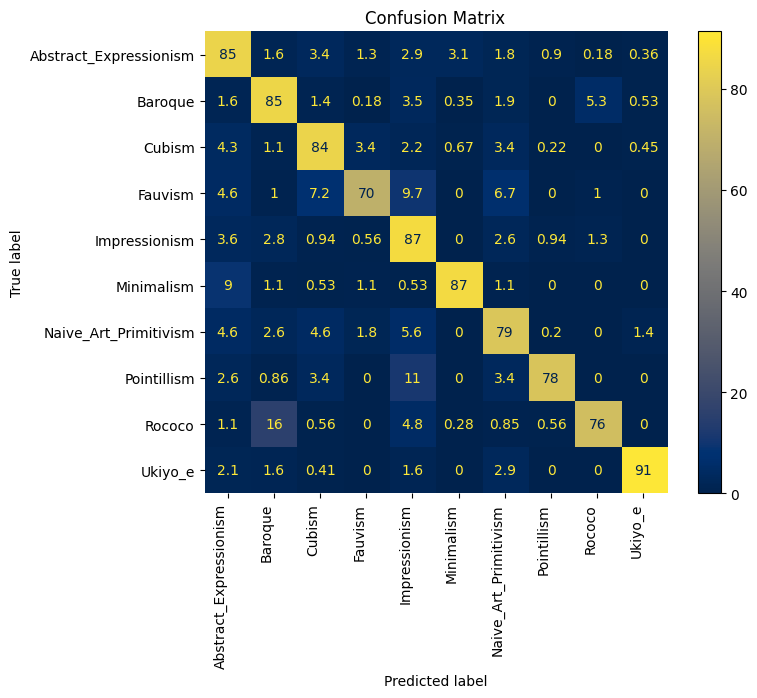

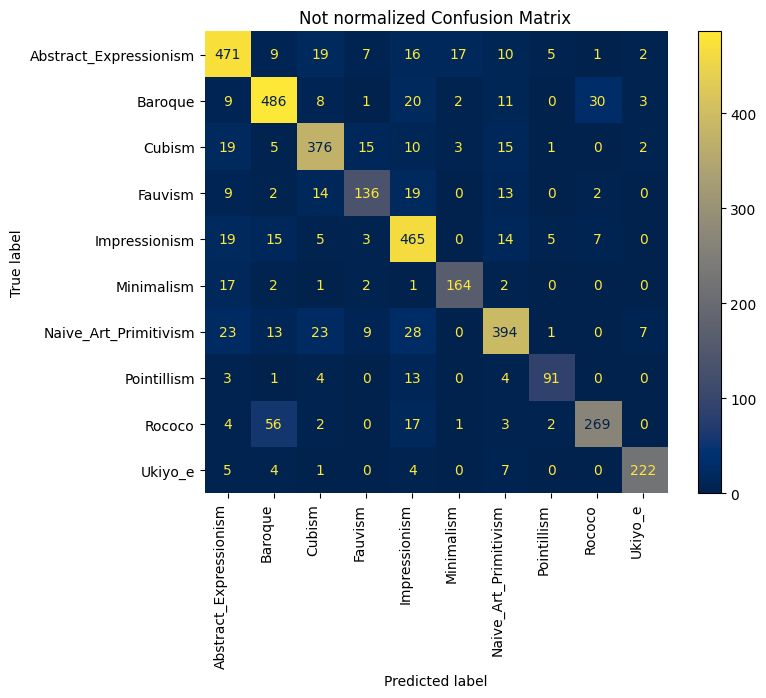

In [10]:
evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [11]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  svc_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.842154  0.840043  0.839928  0.840043  170.245047   
1         2   0.837006  0.833829  0.833504  0.833829  167.935326   
2         3   0.840741  0.838422  0.838272  0.838422  166.270179   
3         4   0.837327  0.835180  0.834945  0.835180  165.753376   
4         5   0.836660  0.834639  0.834628  0.834639  166.399495   
5   Average   0.838777  0.836423  0.836255  0.836423  167.320685   
6  1.581139   0.002499  0.002672  0.002715  0.002672    1.826081   

   Prediction time  
0         5.591753  
1         5.431981  
2         5.679711  
3         5.453816  
4         5.978757  
5         5.627204  
6         0.221234  


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.849192  0.785714  0.816221   602.000000
Baroque                  0.842105  0.806723  0.824034   595.000000
Cubism                   0.800448  0.796875  0.798658   448.000000
Fauvism                  0.764103  0.772021  0.768041   193.000000
Impressionism            0.834897  0.830224  0.832554   536.000000
Minimalism               0.846561  0.869565  0.857909   184.000000
Naive_Art_Primitivism    0.736948  0.815556  0.774262   450.000000
Pointillism              0.775862  0.810811  0.792952   111.000000
Rococo                   0.748588  0.784024  0.765896   338.000000
Ukiyo_e                  0.884774  0.881148  0.882957   244.000000
accuracy                 0.810862  0.810862  0.810862     0.810862
macro avg                0.808348  0.815266  0.811348  3701.000000
weighted avg             0.812825  0.810862  0.811281  3701.000000
--------------------------------------------------------------

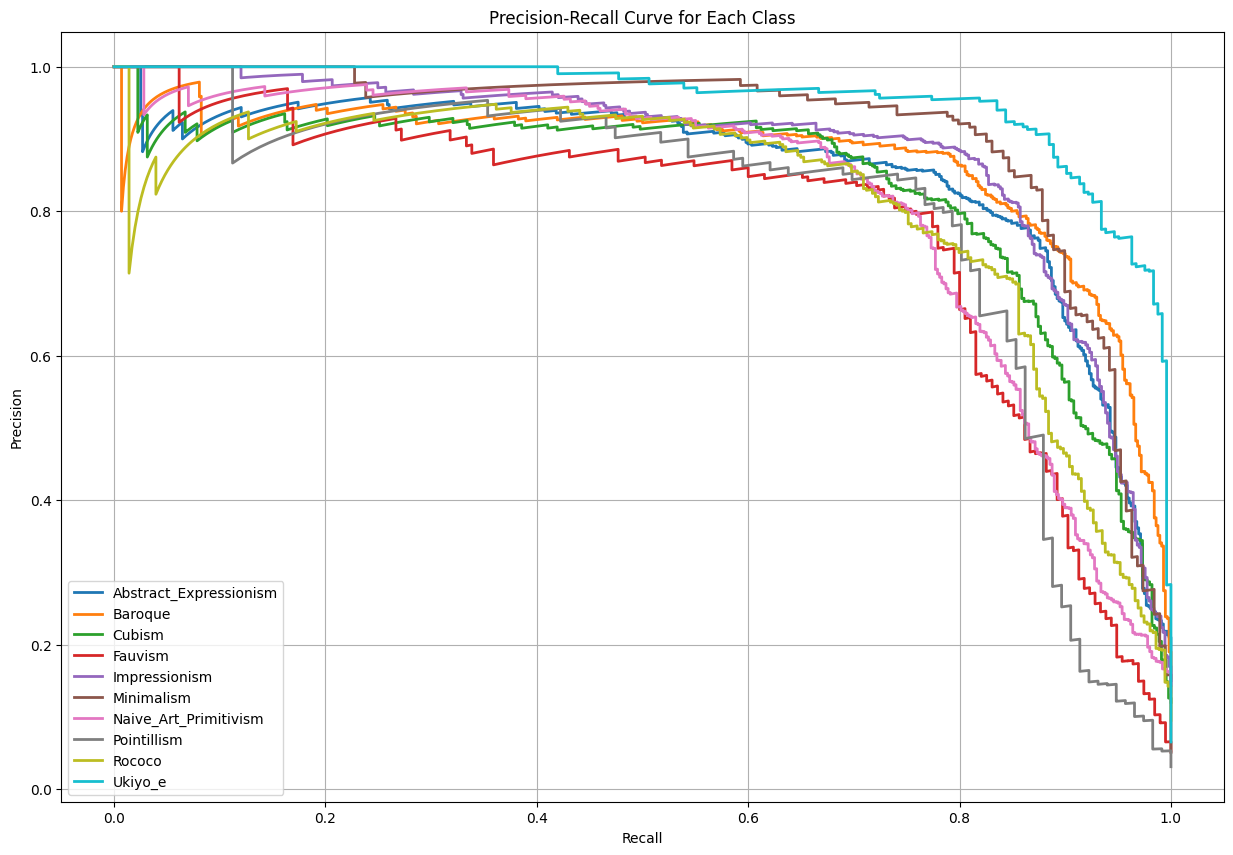

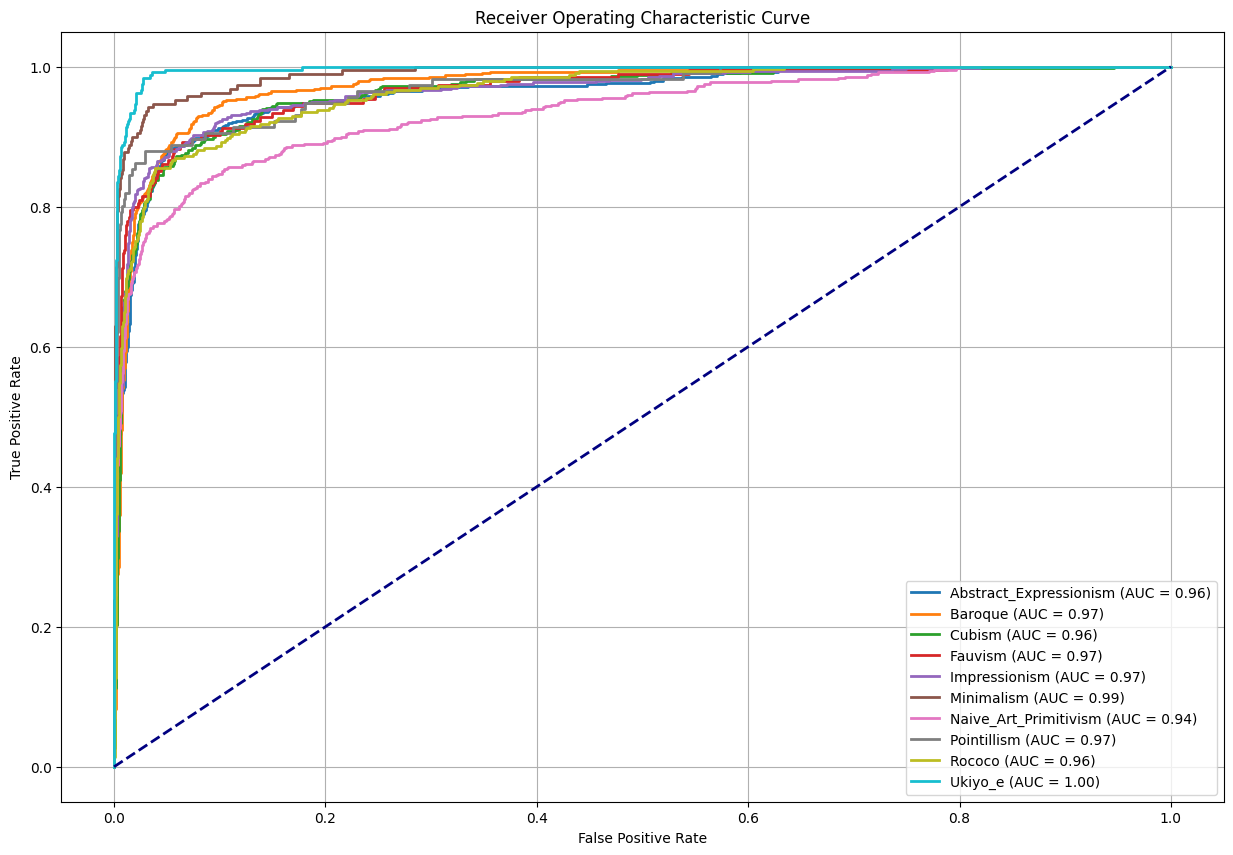

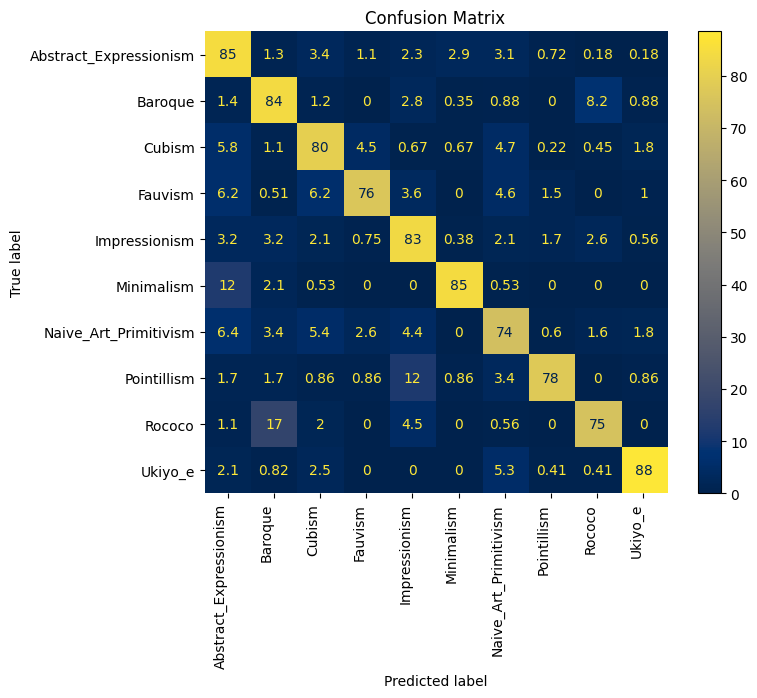

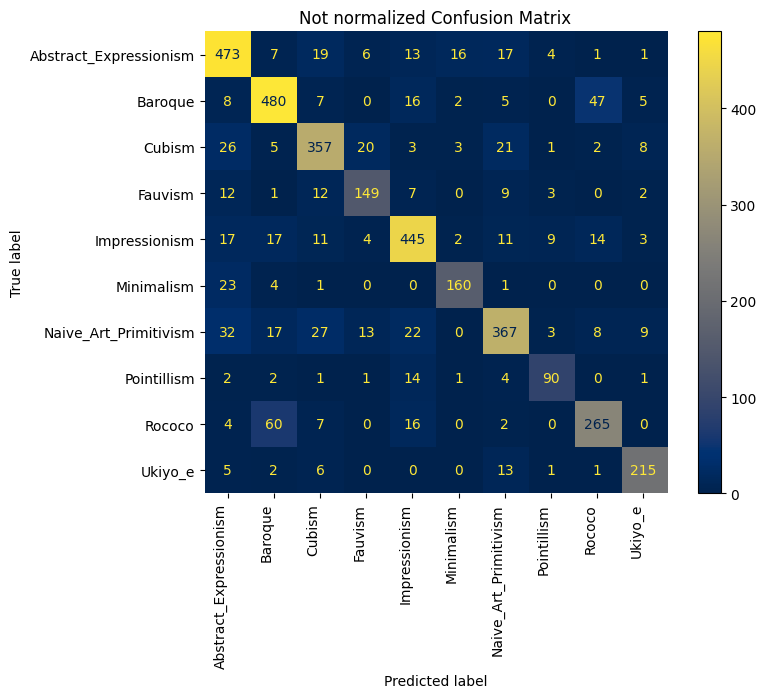

In [6]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(440, 170, 69),  
    solver='adam',
    learning_rate_init=0.0005148340246615198,
    alpha=1.6324225737227937e-05,  
    batch_size=64,  
    activation='logistic',  
    max_iter=610,  
    random_state=42,
    early_stopping=True  
)

mlp_model.fit(X_train_scaled, y_train)
frmodel_pred = mlp_model.predict(X_test_scaled)
frmodel_pred_proba = mlp_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [8]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  mlp_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.825625  0.825182  0.825366  0.825182   55.287057   
1         2   0.814137  0.812483  0.812786  0.812483   51.317965   
2         3   0.817266  0.817076  0.817050  0.817076   36.589147   
3         4   0.812212  0.811132  0.811373  0.811132   51.705284   
4         5   0.817367  0.816806  0.816835  0.816806   44.677703   
5   Average   0.817322  0.816536  0.816682  0.816536   47.915431   
6  1.581139   0.005128  0.005494  0.005453  0.005494    7.400147   

   Prediction time  
0         0.028791  
1         0.030438  
2         0.039442  
3         0.024720  
4         0.031742  
5         0.031027  
6         0.005395  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


with open('X_resnet_2.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_resnet_2.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 14804, Test: 3701


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.800693  0.827957  0.814097   558.000000
Baroque                  0.824324  0.822934  0.823629   593.000000
Cubism                   0.824390  0.773455  0.798111   437.000000
Fauvism                  0.609195  0.692810  0.648318   153.000000
Impressionism            0.864130  0.818182  0.840529   583.000000
Minimalism               0.895735  0.828947  0.861048   228.000000
Naive_Art_Primitivism    0.765408  0.793814  0.779352   485.000000
Pointillism              0.819149  0.885057  0.850829    87.000000
Rococo                   0.756303  0.791789  0.773639   341.000000
Ukiyo_e                  0.922078  0.902542  0.912206   236.000000
accuracy                 0.811943  0.811943  0.811943     0.811943
macro avg                0.808141  0.813749  0.810176  3701.000000
weighted avg             0.814669  0.811943  0.812778  3701.000000
--------------------------------------------------------------

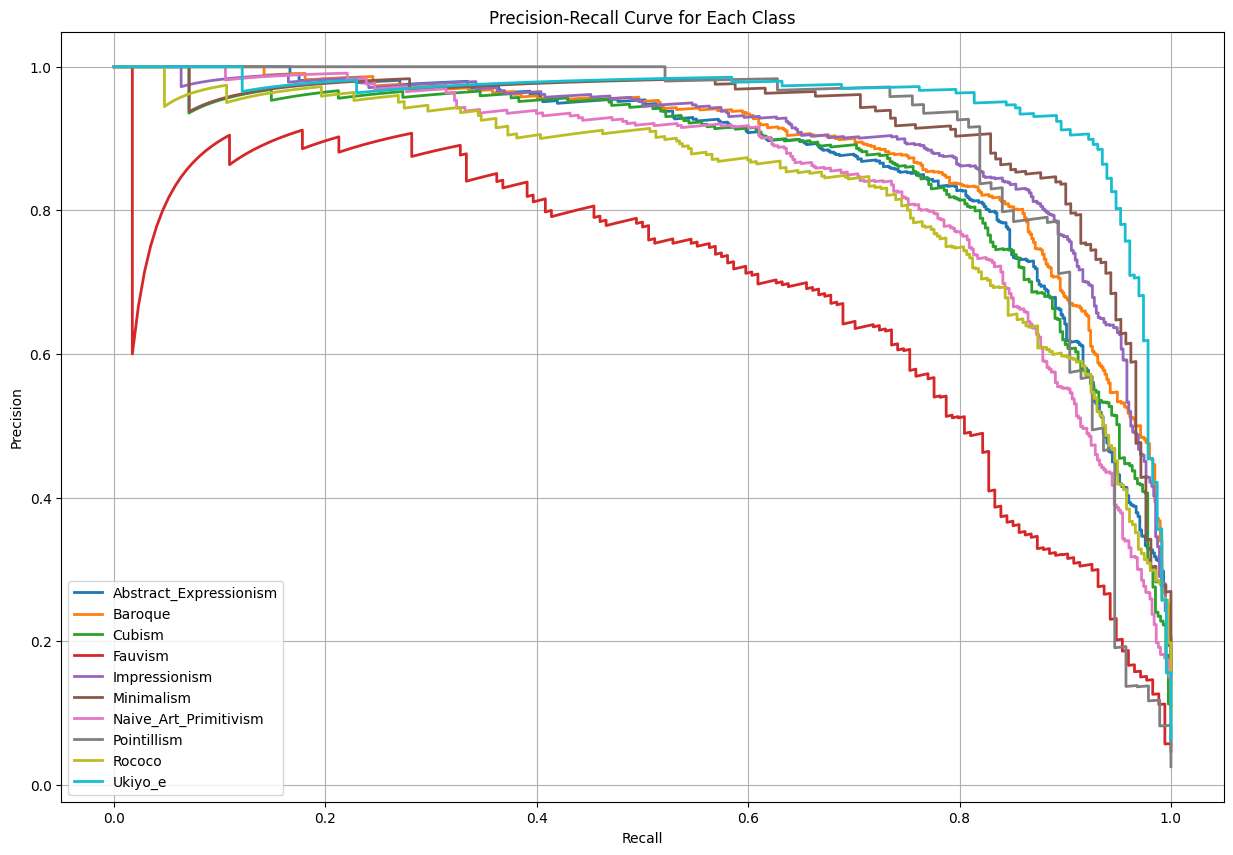

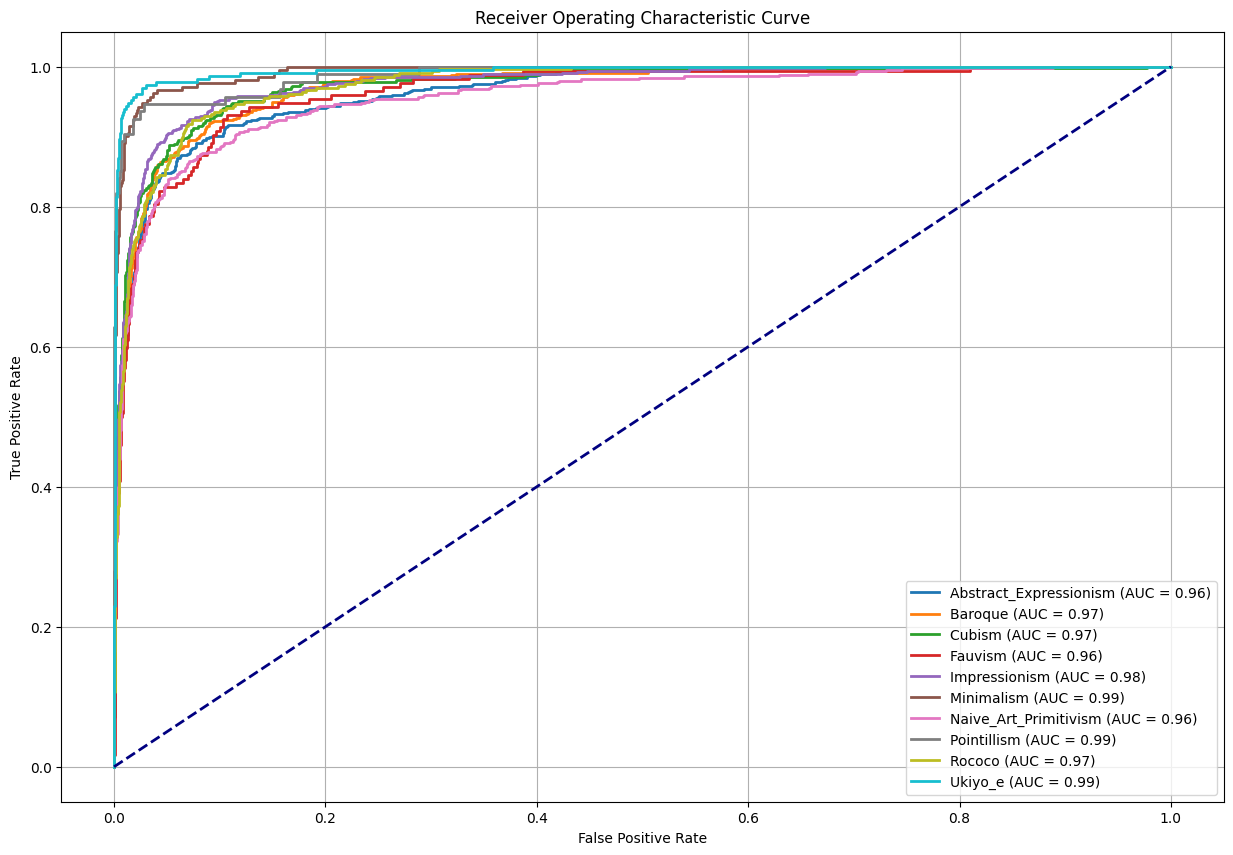

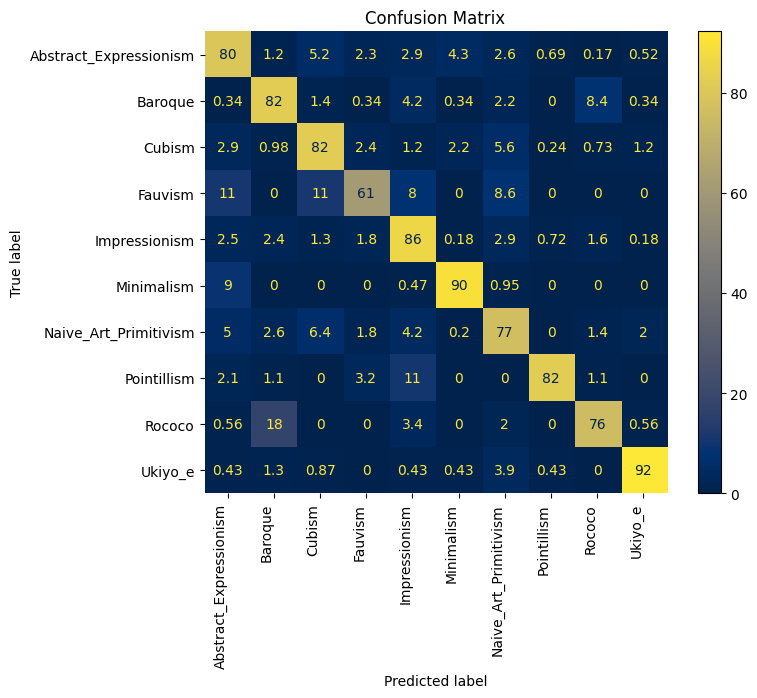

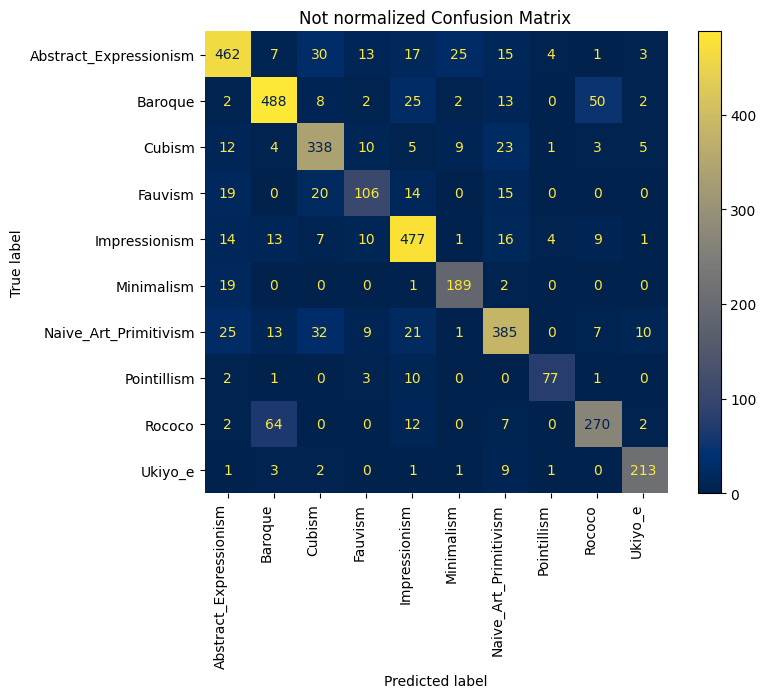

In [10]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(332, 130, 111),  
    solver='adam',
    learning_rate_init=0.0011935962091049461,
    alpha=9.880852955939257e-05,  
    batch_size=64,  
    activation='tanh',  
    max_iter=590,  
    random_state=42,
    early_stopping=True  
)

mlp_model.fit(X_train_scaled, y_train)
frmodel_pred = mlp_model.predict(X_test_scaled)
frmodel_pred_proba = mlp_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)


In [14]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(332, 130, 111),  
    solver='adam',
    learning_rate_init=0.0011935962091049461,
    alpha=9.880852955939257e-05,  
    batch_size=64,  
    activation='tanh',  
    max_iter=590,  
    random_state=42,
    early_stopping=True  
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  mlp_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.808745  0.808700  0.808256  0.808700   21.298084   
1         2   0.799640  0.799514  0.799137  0.799514   28.643856   
2         3   0.800717  0.800324  0.800157  0.800324   29.947948   
3         4   0.810499  0.810862  0.810313  0.810862   20.426383   
4         5   0.817425  0.817076  0.817106  0.817076   20.247740   
5   Average   0.807405  0.807295  0.806993  0.807295   24.112802   
6  1.581139   0.007362  0.007408  0.007472  0.007408    4.770493   

   Prediction time  
0         0.033935  
1         0.033478  
2         0.033260  
3         0.036078  
4         0.031562  
5         0.033663  
6         0.001621  


/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.778163  0.880392  0.826127   510.000000
Baroque                  0.842905  0.798400  0.820049   625.000000
Cubism                   0.848780  0.828571  0.838554   420.000000
Fauvism                  0.724138  0.745562  0.734694   169.000000
Impressionism            0.875000  0.766667  0.817259   630.000000
Minimalism               0.796209  0.943820  0.863753   178.000000
Naive_Art_Primitivism    0.765408  0.869074  0.813953   443.000000
Pointillism              0.819149  0.885057  0.850829    87.000000
Rococo                   0.826331  0.750636  0.786667   393.000000
Ukiyo_e                  0.900433  0.845528  0.872117   246.000000
accuracy                 0.820859  0.820859  0.820859     0.820859
macro avg                0.817652  0.831371  0.822400  3701.000000
weighted avg             0.824674  0.820859  0.820626  3701.000000
--------------------------------------------------------------

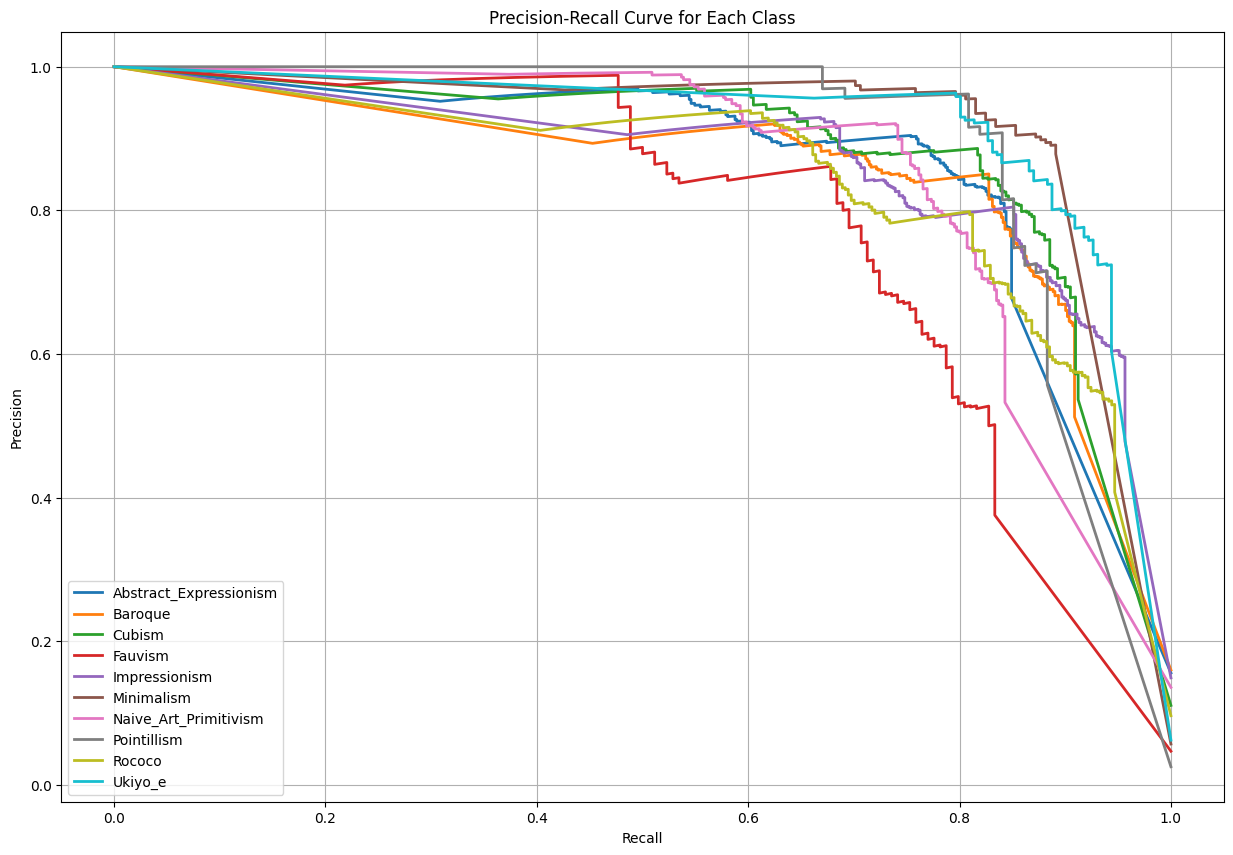

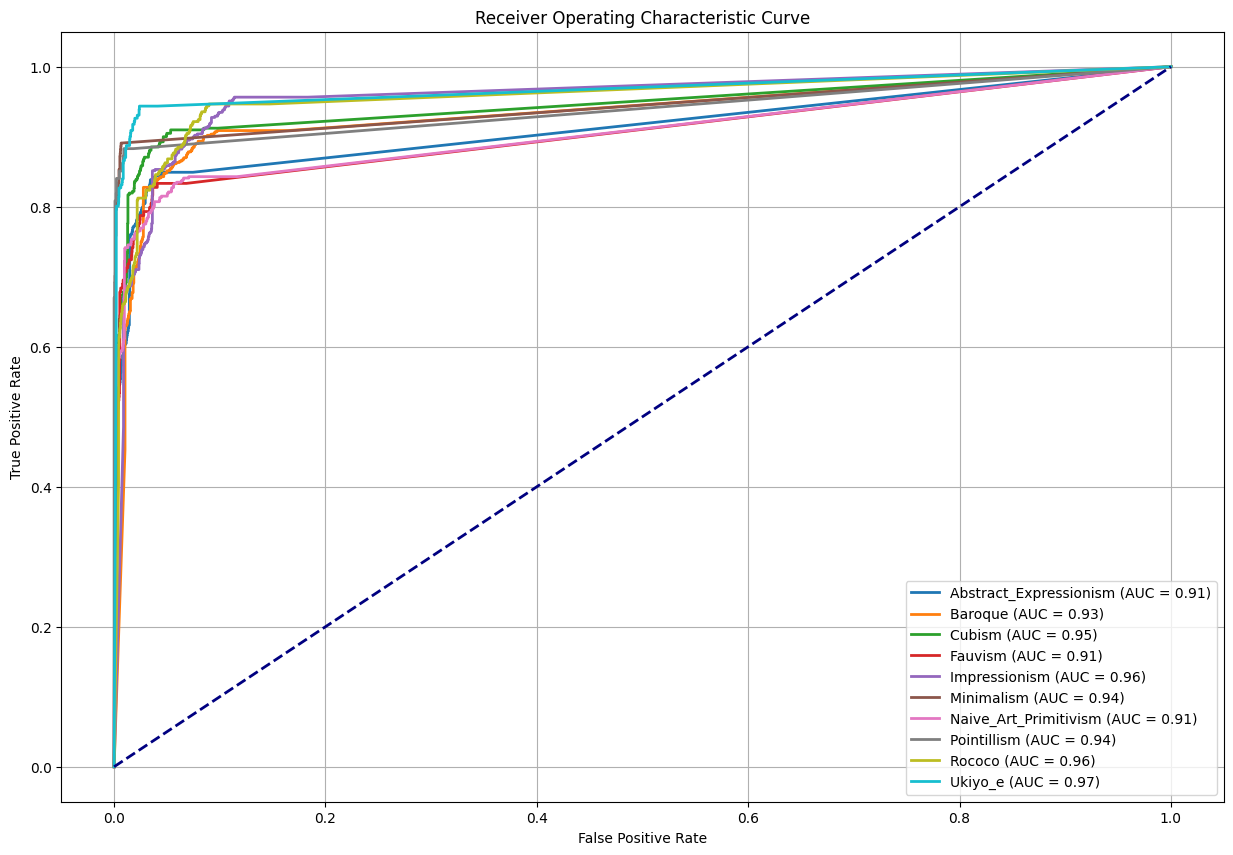

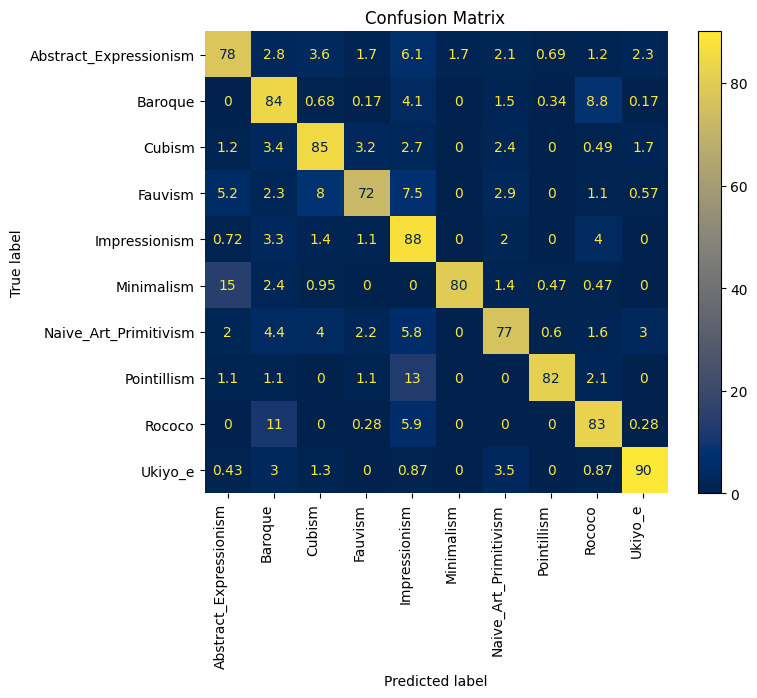

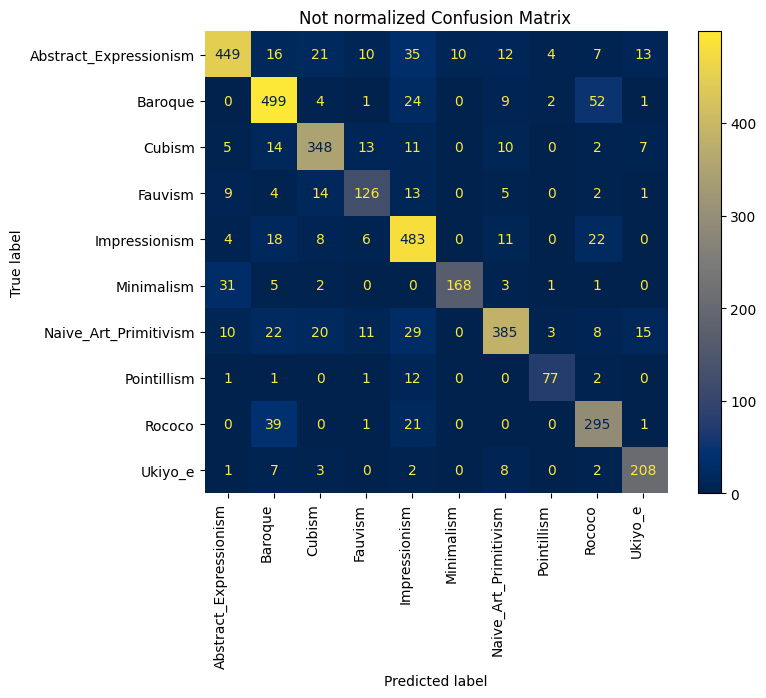

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    metric='manhattan',
    algorithm='auto',
    n_neighbors=3,
    weights='distance',
    leaf_size=40,
    p=1  
)

knn_model.fit(X_train_scaled, y_train)
frmodel_pred = knn_model.predict(X_test_scaled)
frmodel_pred_proba = knn_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [18]:
knn_model = KNeighborsClassifier(
    metric='manhattan',
    algorithm='auto',
    n_neighbors=3,
    weights='distance',
    leaf_size=40,
    p=1  
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  knn_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.814800  0.809241  0.809181  0.809241    0.005521   
1         2   0.820687  0.815725  0.815723  0.815725    0.005391   
2         3   0.800265  0.794650  0.794359  0.794650    0.015778   
3         4   0.823768  0.818968  0.818773  0.818968    0.015121   
4         5   0.820999  0.815725  0.815990  0.815725    0.016290   
5   Average   0.816104  0.810862  0.810805  0.810862    0.011620   
6  1.581139   0.009438  0.009727  0.009845  0.009727    0.005643   

   Prediction time  
0         0.390416  
1         0.389339  
2         0.386917  
3         0.383013  
4         0.383149  
5         0.386567  
6         0.003426  


                        precision    recall  f1-score      support
Abstract_Expressionism   0.863085  0.857143  0.860104   581.000000
Baroque                  0.878378  0.853859  0.865945   609.000000
Cubism                   0.860976  0.858881  0.859927   411.000000
Fauvism                  0.752874  0.850649  0.798780   154.000000
Impressionism            0.929348  0.828756  0.876174   619.000000
Minimalism               0.919431  0.881818  0.900232   220.000000
Naive_Art_Primitivism    0.811133  0.879310  0.843847   464.000000
Pointillism              0.882979  0.965116  0.922222    86.000000
Rococo                   0.803922  0.885802  0.842878   324.000000
Ukiyo_e                  0.939394  0.931330  0.935345   233.000000
accuracy                 0.865712  0.865712  0.865712     0.865712
macro avg                0.864152  0.879267  0.870545  3701.000000
weighted avg             0.868787  0.865712  0.866201  3701.000000
--------------------------------------------------------------

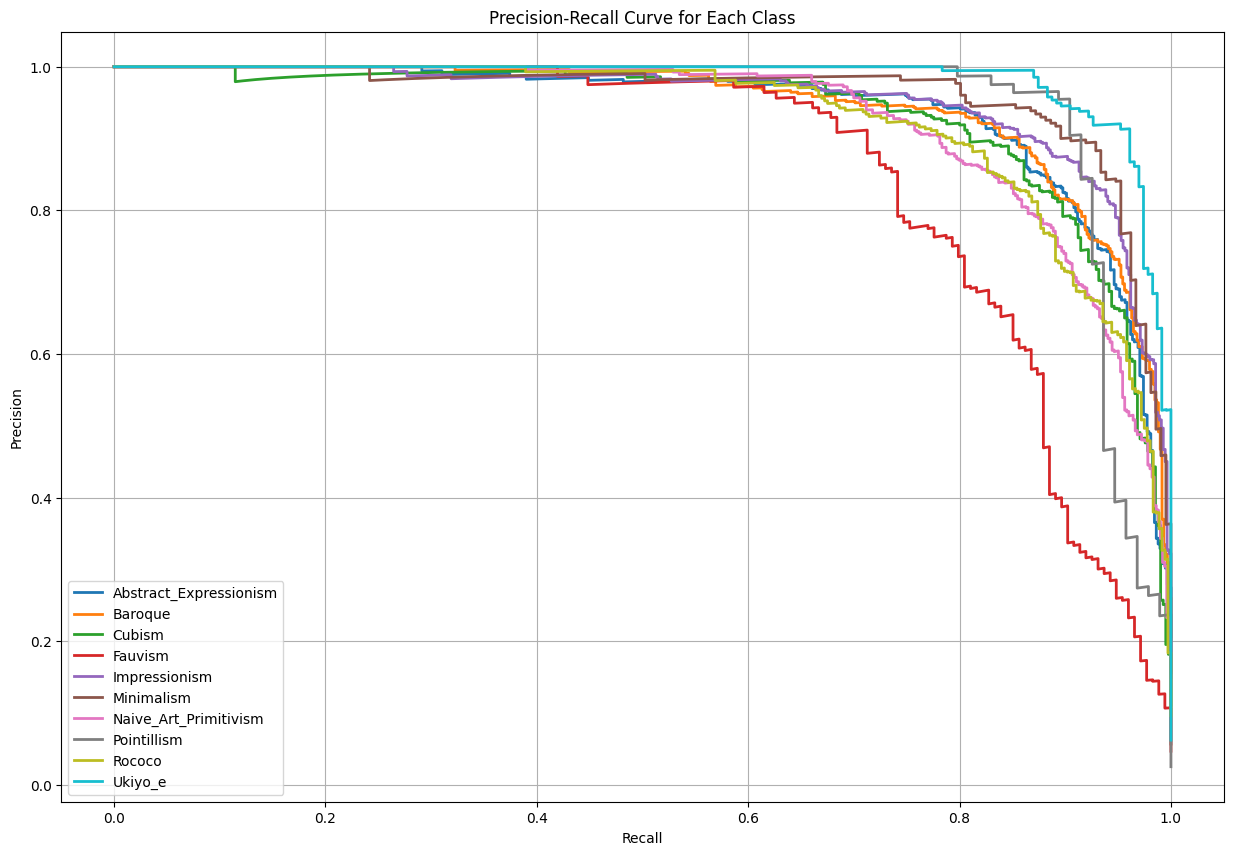

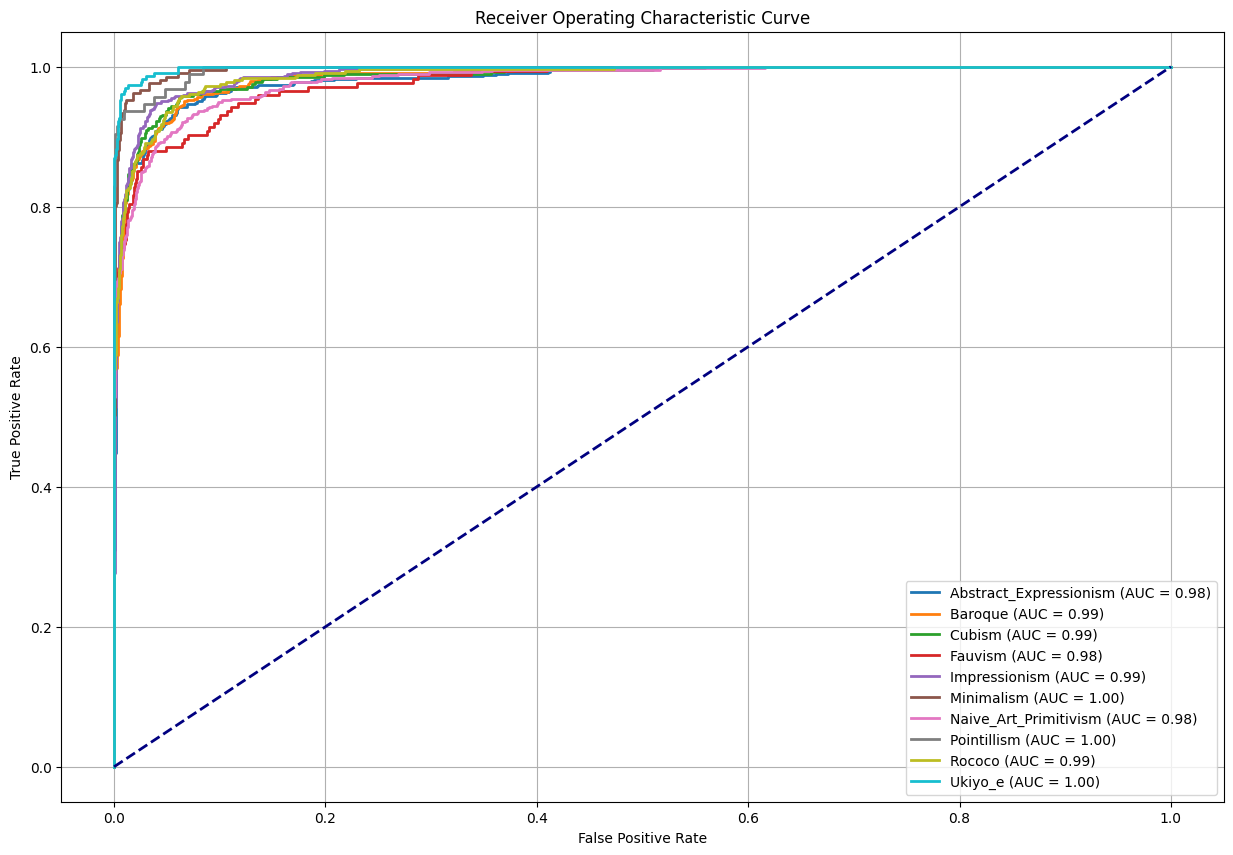

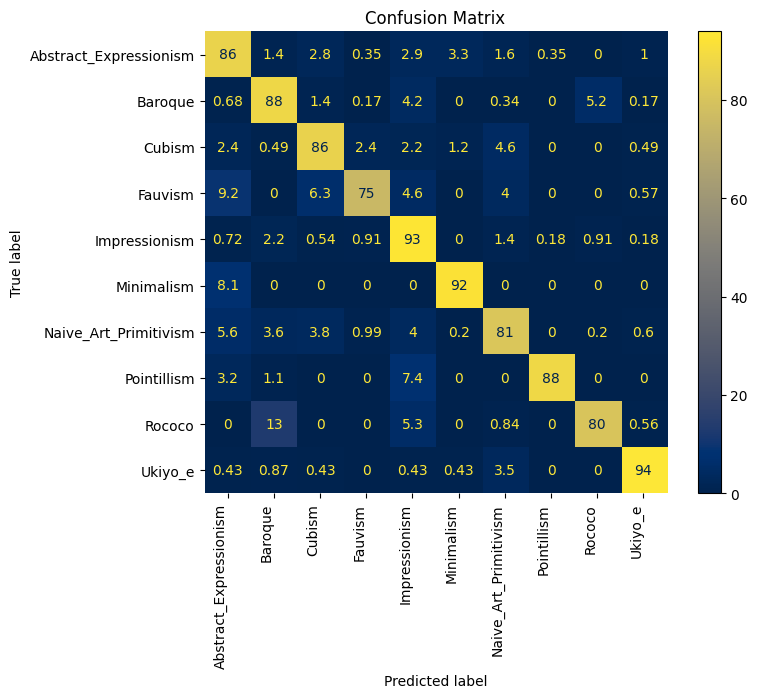

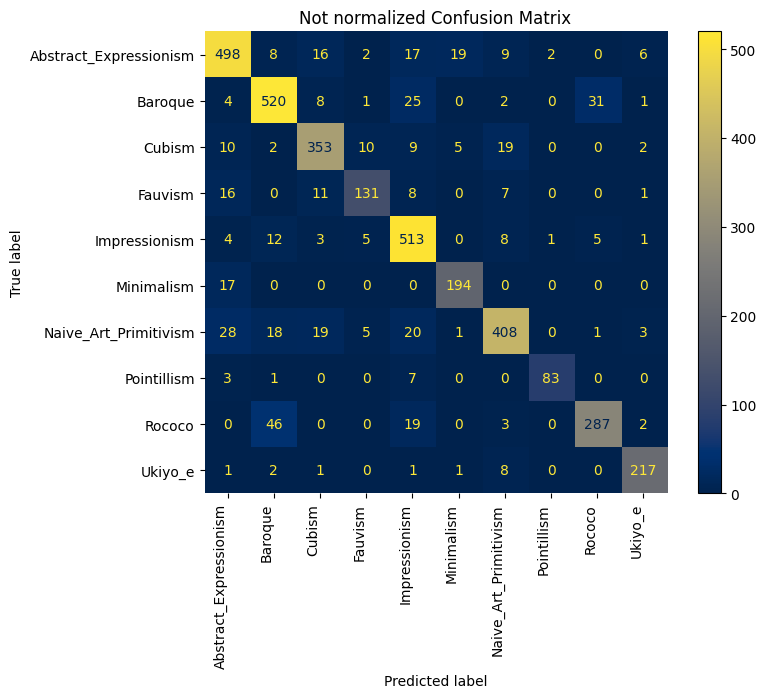

In [19]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=6,
    learning_rate=0.06880464674379164,
    subsample=0.5717805315996993,
    colsample_bytree=0.72163837917479,
    gamma= 0.739211143509742,
    reg_lambda=0.31918802481802655,
    reg_alpha=0.5515715243593446,
    objective="multi:softmax",  
    eval_metric="mlogloss",
    tree_method="hist", 
)
xgb_model.fit(X_train_scaled, y_train)
frmodel_pred = xgb_model.predict(X_test_scaled)
frmodel_pred_proba = xgb_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)


In [20]:
xgb_model = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=6,
    learning_rate=0.06880464674379164,
    subsample=0.5717805315996993,
    colsample_bytree=0.72163837917479,
    gamma= 0.739211143509742,
    reg_lambda=0.31918802481802655,
    reg_alpha=0.5515715243593446,
    objective="multi:softmax",  
    eval_metric="mlogloss",
    tree_method="hist", 
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  xgb_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.857716  0.857336  0.856950  0.857336   31.727713   
1         2   0.855511  0.854634  0.854129  0.854634   35.138542   
2         3   0.853846  0.853283  0.852195  0.853283   37.192306   
3         4   0.871794  0.871386  0.871033  0.871386   35.641209   
4         5   0.861693  0.861659  0.861479  0.861659   36.609866   
5   Average   0.860112  0.859660  0.859157  0.859660   35.261927   
6  1.581139   0.007161  0.007294  0.007501  0.007294    2.132666   

   Prediction time  
0         0.016122  
1         0.017877  
2         0.019433  
3         0.016232  
4         0.015237  
5         0.016980  
6         0.001670  


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.875217  0.834711  0.854484   605.000000
Baroque                  0.881757  0.822047  0.850856   635.000000
Cubism                   0.870732  0.832168  0.851013   429.000000
Fauvism                  0.678161  0.893939  0.771242   132.000000
Impressionism            0.916667  0.805732  0.857627   628.000000
Minimalism               0.905213  0.905213  0.905213   211.000000
Naive_Art_Primitivism    0.781312  0.875278  0.825630   449.000000
Pointillism              0.840426  1.000000  0.913295    79.000000
Rococo                   0.747899  0.881188  0.809091   303.000000
Ukiyo_e                  0.917749  0.921739  0.919740   230.000000
accuracy                 0.851121  0.851121  0.851121     0.851121
macro avg                0.841513  0.877202  0.855819  3701.000000
weighted avg             0.857619  0.851121  0.852010  3701.000000
--------------------------------------------------------------

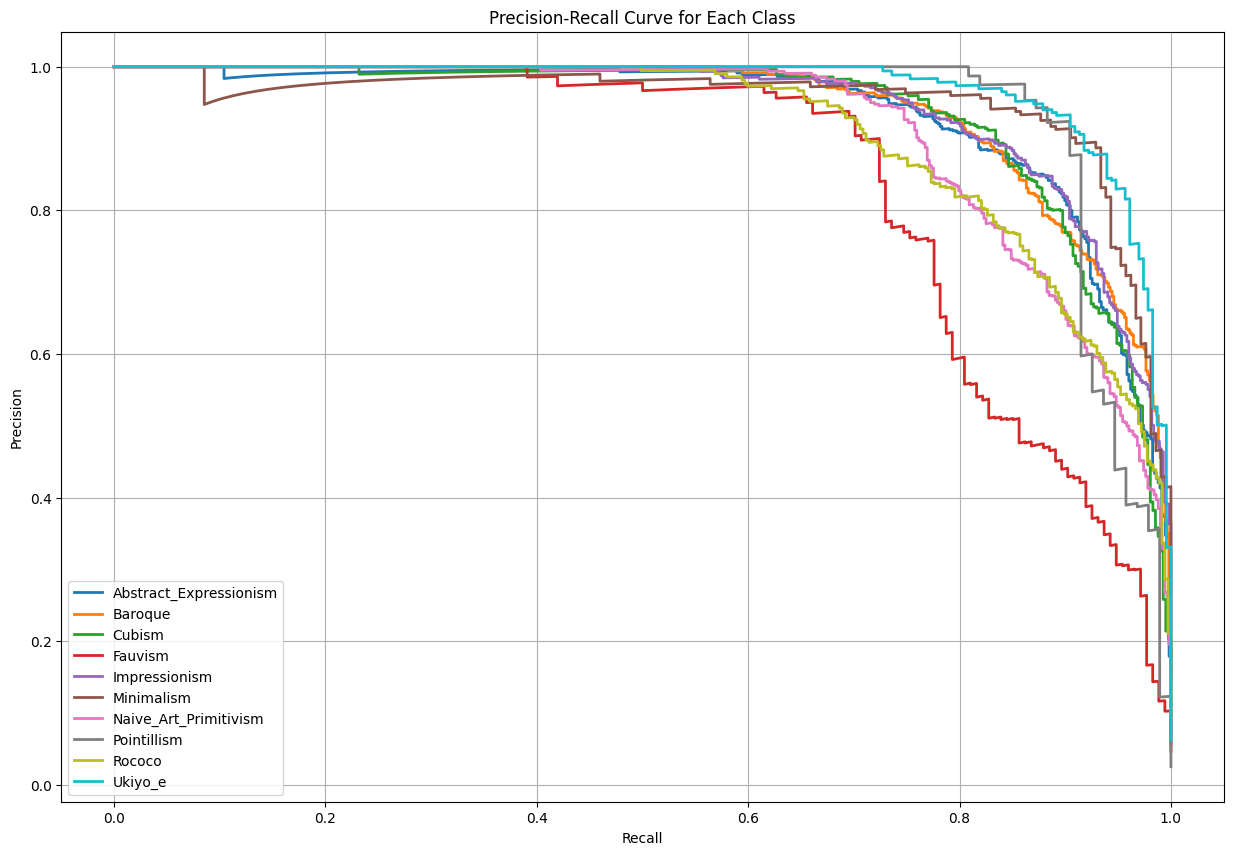

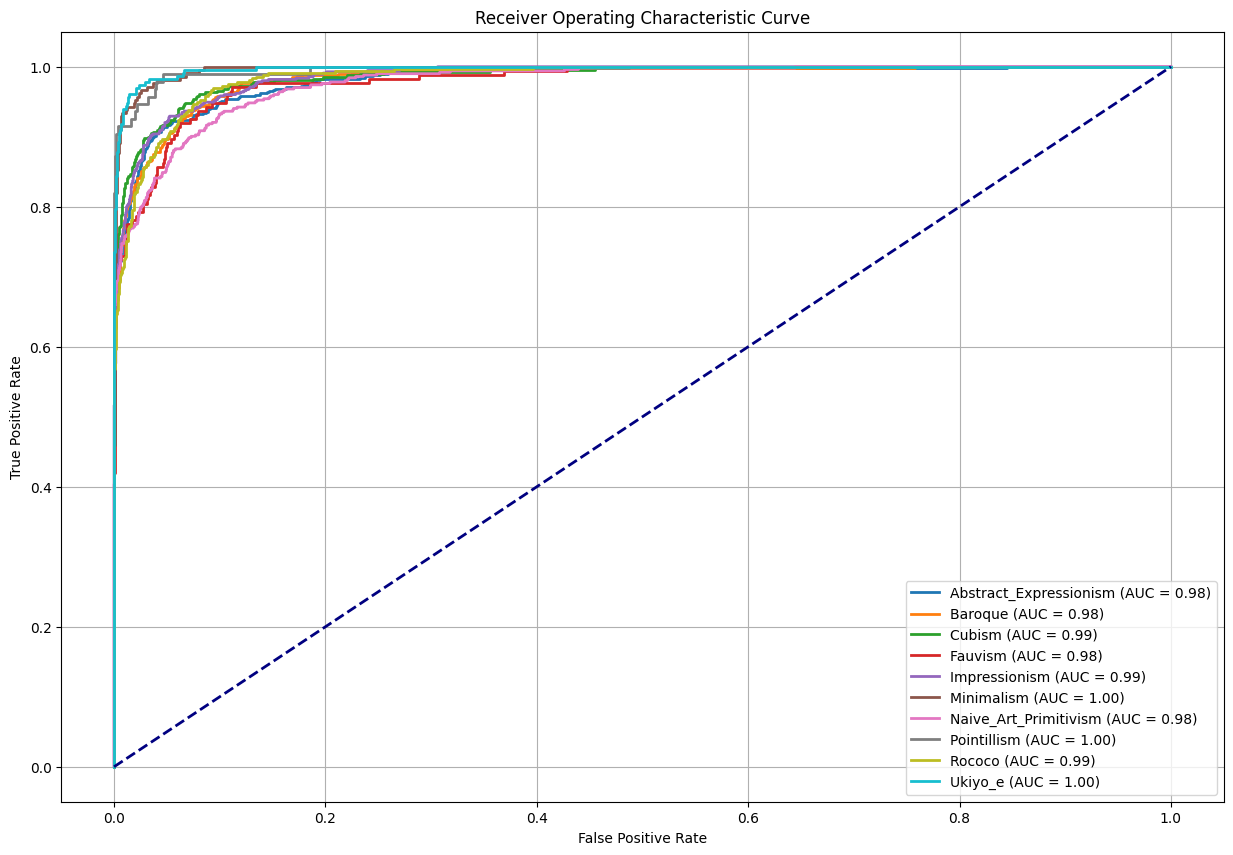

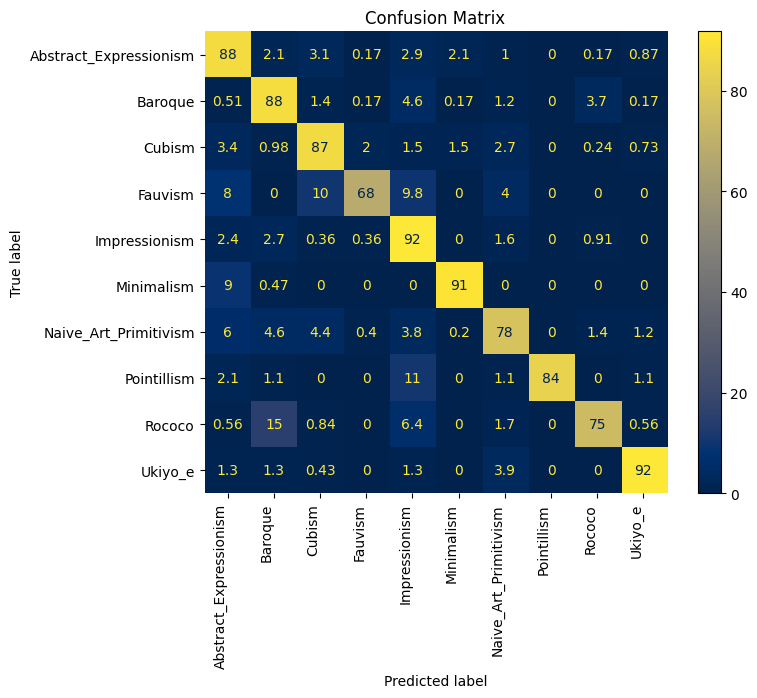

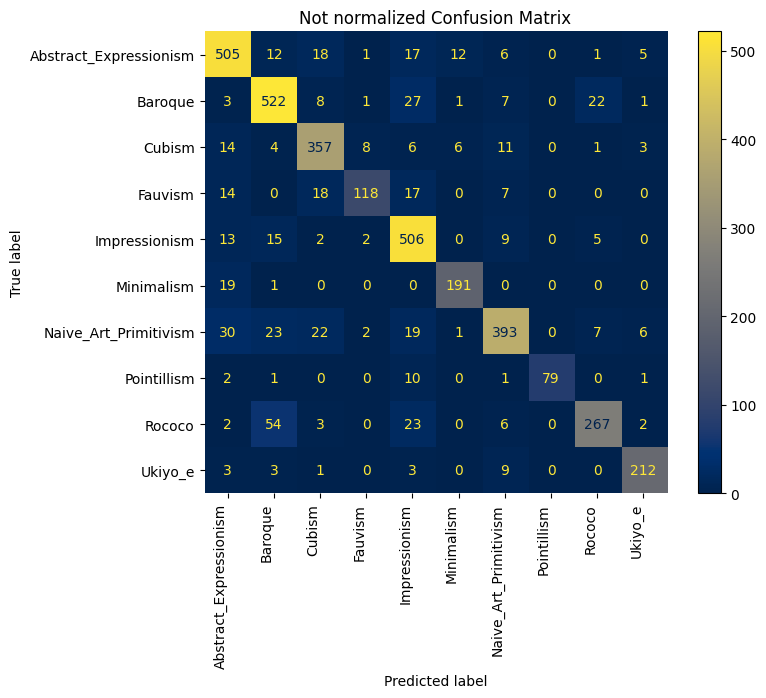

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators = 1100, 
                                 max_depth = 31, 
                                 min_samples_split =  8,
                                 min_samples_leaf = 2, 
                                 max_features = 'sqrt', 
                                 bootstrap = False,  
                                 criterion = 'gini')
rfmodel.fit(X_train_scaled, y_train)
frmodel_pred = rfmodel.predict(X_test_scaled)
frmodel_pred_proba = rfmodel.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [22]:
rfmodel = RandomForestClassifier(n_estimators = 1100, 
                                 max_depth = 31, 
                                 min_samples_split =  8,
                                 min_samples_leaf = 2, 
                                 max_features = 'sqrt', 
                                 bootstrap = False,  
                                 criterion = 'gini')
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  rfmodel , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.851439  0.847879  0.847439  0.847879  312.568703   
1         2   0.843051  0.839773  0.838586  0.839773  310.161274   
2         3   0.841161  0.836531  0.834693  0.836531  309.487320   
3         4   0.860718  0.858146  0.857576  0.858146  310.413325   
4         5   0.853562  0.852202  0.851431  0.852202  309.584707   
5   Average   0.849986  0.846906  0.845945  0.846906  310.443066   
6  1.581139   0.008000  0.008858  0.009333  0.008858    1.249886   

   Prediction time  
0         0.790405  
1         0.838704  
2         0.859523  
3         1.092406  
4         0.742762  
5         0.864760  
6         0.135038  


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import  numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import psutil
import pandas as pd
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
def precision_recall_draw(y_true, y_score):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import precision_recall_curve

    y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])

    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'{class_name}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Each Class')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


def roc_draw(y_true, y_score):
  from sklearn.preprocessing import label_binarize
  plt.figure(figsize=(15, 10))
  y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])


  for i, class_name in enumerate(class_names):
     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     roc_auc = auc(fpr, tpr)
     plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')


  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()


def evaluate_model(y_true, y_pred, y_pred_proba):
    report_dict = classification_report(y_pred, y_true, target_names=class_names, output_dict=True)
    metrics_df2 = pd.DataFrame(report_dict).transpose()
    print(metrics_df2)
    print("-----------------------------------------------------------------------------------------------------------")

    precision_recall_draw(y_true, y_pred_proba)
    roc_draw(y_true, y_pred_proba)
    cm =confusion_matrix(y_true, y_pred, normalize = 'true')
    #cm_percent_row = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
    
    disp = ConfusionMatrixDisplay(cm*100, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Confusion Matrix")
    #plt.colorbar(ax.collections[0], ax=ax)  
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Not normalized Confusion Matrix")
    plt.show()

In [ ]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
#import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e
from sklearn.model_selection import StratifiedKFold, cross_val_score


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['Abstract_Expressionism','Baroque','Cubism', 'Fauvism', 'Impressionism','Minimalism','Naive_Art_Primitivism','Pointillism','Rococo','Ukiyo_e']
device = 'cpu'

num_classes = 10
